In [75]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

In [29]:
votes = pd.read_csv('~/Datasets/votes.csv', index_col=0)

In [30]:
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
2,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
3,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
4,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
5,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [21]:
votes.isnull().sum()

Class      0
V1        12
V2        48
V3        11
V4        11
V5        15
V6        11
V7        14
V8        15
V9        22
V10        7
V11       21
V12       31
V13       25
V14       17
V15       28
V16      104
dtype: int64

In [31]:
y = votes['Class'].copy()

In [33]:
y.head()

1    republican
2    republican
3      democrat
4      democrat
5      democrat
Name: Class, dtype: object

In [34]:
for i in votes.columns:
    votes[i] = votes[i].apply(lambda x: 1 if x == 'y' else 0)

In [35]:
votes.head()

,Class,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,0,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
2,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
3,0,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
4,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
5,0,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


In [36]:
votes.isnull().sum()

Class    0
V1       0
V2       0
V3       0
V4       0
V5       0
V6       0
V7       0
V8       0
V9       0
V10      0
V11      0
V12      0
V13      0
V14      0
V15      0
V16      0
dtype: int64

In [38]:
x = votes[[col for col in votes.columns if col != "Class"]]
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16
1,0,1,0,1,1,1,0,0,0,1,0,1,1,1,0,1
2,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,0
3,0,1,1,0,1,1,0,0,0,0,1,0,1,1,0,0
4,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
5,1,1,1,0,1,1,0,0,0,0,1,0,1,1,1,1


### standardize data, create covariance matrix

In [39]:
napoleon = StandardScaler().fit_transform(x)
napoleon[0:5]

array([[-0.86835031,  1.10940039, -1.17902922,  1.20732229,  1.02561532,
         0.77412189, -1.10425892, -1.11977052, -0.9528351 ,  1.0069205 ,
        -0.72547625,  1.24252149,  1.03987485,  0.86835031, -0.81649658,
         0.78555736],
       [-0.86835031,  1.10940039, -1.17902922,  1.20732229,  1.02561532,
         0.77412189, -1.10425892, -1.11977052, -0.9528351 , -0.99312707,
        -0.72547625,  1.24252149,  1.03987485,  0.86835031, -0.81649658,
        -1.27298151],
       [-0.86835031,  1.10940039,  0.8481554 , -0.82827925,  1.02561532,
         0.77412189, -1.10425892, -1.11977052, -0.9528351 , -0.99312707,
         1.37840488, -0.80481505,  1.03987485,  0.86835031, -0.81649658,
        -1.27298151],
       [-0.86835031,  1.10940039,  0.8481554 , -0.82827925, -0.97502443,
         0.77412189, -1.10425892, -1.11977052, -0.9528351 , -0.99312707,
         1.37840488, -0.80481505,  1.03987485, -1.15160897, -0.81649658,
         0.78555736],
       [ 1.15160897,  1.10940039,  0

In [40]:
napoleon.shape

(435, 16)

In [50]:
## makes a covariance matrix, which shows how each column relates to the others

covariance_matrix = np.cov(napoleon.T)


In [44]:
covariance_matrix.shape

(16, 16)

In [45]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [46]:
eigenvalues[:5]

array([ 7.102243  ,  1.44867882,  1.1998064 ,  0.88126251,  0.8248454 ])

In [48]:
eigenvalues.shape

(16,)

In [47]:
eigenvectors[:5]

array([[-0.18803934, -0.19357121,  0.07328808,  0.51751543,  0.35845006,
         0.62089874, -0.05713493, -0.00747574,  0.15602045, -0.03613906,
        -0.07010134, -0.20296072,  0.12290505,  0.07348099,  0.20525446,
        -0.04760145],
       [ 0.05231849, -0.5860793 , -0.23045319,  0.37516036,  0.12646973,
        -0.55398342,  0.01855198, -0.10910015,  0.10486865,  0.0799821 ,
         0.0801356 , -0.13259865, -0.06581724,  0.07925709, -0.00808044,
         0.26963501],
       [-0.29660826, -0.08013044, -0.16884543, -0.01308925,  0.10990706,
         0.03068335, -0.2133564 , -0.06665988, -0.17958811, -0.23883742,
         0.56681358,  0.45295072,  0.08181081, -0.3596669 ,  0.23464645,
         0.08418781],
       [ 0.31510691,  0.1422561 ,  0.07340739,  0.13936979, -0.00770719,
        -0.05450439, -0.39727071,  0.4526401 ,  0.17904898, -0.55964437,
         0.01205996,  0.0780124 , -0.11191782,  0.25270932,  0.01034961,
         0.24886662],
       [ 0.33401889, -0.0385968 , -0

In [49]:
eigenvectors.shape

(16, 16)

### Make the principal components

In [51]:
eigenpairs = zip(eigenvalues, eigenvectors)
eigenpairs

[(7.1022429960917224,
  array([-0.18803934, -0.19357121,  0.07328808,  0.51751543,  0.35845006,
          0.62089874, -0.05713493, -0.00747574,  0.15602045, -0.03613906,
         -0.07010134, -0.20296072,  0.12290505,  0.07348099,  0.20525446,
         -0.04760145])),
 (1.4486788186332433,
  array([ 0.05231849, -0.5860793 , -0.23045319,  0.37516036,  0.12646973,
         -0.55398342,  0.01855198, -0.10910015,  0.10486865,  0.0799821 ,
          0.0801356 , -0.13259865, -0.06581724,  0.07925709, -0.00808044,
          0.26963501])),
 (1.1998063964339241,
  array([-0.29660826, -0.08013044, -0.16884543, -0.01308925,  0.10990706,
          0.03068335, -0.2133564 , -0.06665988, -0.17958811, -0.23883742,
          0.56681358,  0.45295072,  0.08181081, -0.3596669 ,  0.23464645,
          0.08418781])),
 (0.88126250977162979,
  array([ 0.31510691,  0.1422561 ,  0.07340739,  0.13936979, -0.00770719,
         -0.05450439, -0.39727071,  0.4526401 ,  0.17904898, -0.55964437,
          0.01205996, 

In [52]:
for i in sorted(eigenvalues, reverse=True):
    print i

7.10224299609
1.44867881863
1.19980639643
0.881262509772
0.824845400306
0.738005397126
0.610366646038
0.540307526332
0.5143146149
0.456396531035
0.413404865073
0.359673279653
0.31858993662
0.276223460272
0.211883908313
0.140864072849


In [53]:
for i in sorted(eigenpairs, reverse=True):
    print i

(7.1022429960917224, array([-0.18803934, -0.19357121,  0.07328808,  0.51751543,  0.35845006,
        0.62089874, -0.05713493, -0.00747574,  0.15602045, -0.03613906,
       -0.07010134, -0.20296072,  0.12290505,  0.07348099,  0.20525446,
       -0.04760145]))
(1.4486788186332433, array([ 0.05231849, -0.5860793 , -0.23045319,  0.37516036,  0.12646973,
       -0.55398342,  0.01855198, -0.10910015,  0.10486865,  0.0799821 ,
        0.0801356 , -0.13259865, -0.06581724,  0.07925709, -0.00808044,
        0.26963501]))
(1.1998063964339241, array([-0.29660826, -0.08013044, -0.16884543, -0.01308925,  0.10990706,
        0.03068335, -0.2133564 , -0.06665988, -0.17958811, -0.23883742,
        0.56681358,  0.45295072,  0.08181081, -0.3596669 ,  0.23464645,
        0.08418781]))
(0.88126250977162979, array([ 0.31510691,  0.1422561 ,  0.07340739,  0.13936979, -0.00770719,
       -0.05450439, -0.39727071,  0.4526401 ,  0.17904898, -0.55964437,
        0.01205996,  0.0780124 , -0.11191782,  0.25270932

### Calculate explained variance for each pc

In [54]:
eigensums = sum(eigenvalues)

In [55]:
for eig in sorted(eigenpairs, reverse=True):
    print eig[0] / eigensums, eig[0]

0.442869750044 7.10224299609
0.0903342826562 1.44867881863
0.0748155138006 1.19980639643
0.054952288684 0.881262509772
0.051434325249 0.824845400306
0.0460193020622 0.738005397126
0.0380602190202 0.610366646038
0.033691590004 0.540307526332
0.0320707676532 0.5143146149
0.0284592089754 0.456396531035
0.0257784068163 0.413404865073
0.022427902783 0.359673279653
0.0198660966226 0.31858993662
0.0172242789882 0.276223460272
0.0132123011793 0.211883908313
0.00878376546217 0.140864072849


In [56]:
varianceexplained = [(i/eigensums)*100 for i in sorted(eigenvalues, reverse=True)]

In [57]:
varianceexplained

[44.28697500436504,
 9.0334282656153384,
 7.4815513800621112,
 5.4952288684035526,
 5.1434325248950232,
 4.6019302062155623,
 3.8060219020170365,
 3.3691590004030161,
 3.2070767653227876,
 2.8459208975440626,
 2.5778406816338881,
 2.2427902782952089,
 1.9866096622564635,
 1.7224278988231507,
 1.3212301179310875,
 0.87837654621665939]

In [59]:
cumulativeVarianceexplained = np.cumsum(varianceexplained)

In [60]:
cumulativeVarianceexplained

array([ 44.286975  ,  53.32040327,  60.80195465,  66.29718352,
        71.44061604,  76.04254625,  79.84856815,  83.21772715,
        86.42480392,  89.27072481,  91.8485655 ,  94.09135577,
        96.07796544,  97.80039334,  99.12162345, 100.        ])

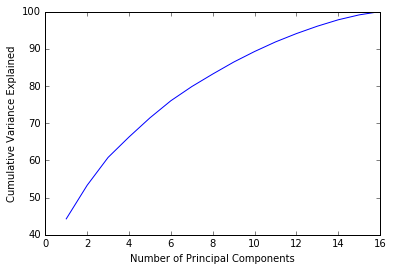

In [73]:
plt.plot(range(1,17), cumulativeVarianceexplained)
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [71]:
# fit_me = [(eigenpair[1].reshape(16,1)) for eigenpair in sorted(eigenpairs, reverse=True)[0:8]]

fit_me = []

for eigenpair in sorted(eigenpairs, reverse=True)[0:8]:
    fit_me.append(eigenpair[1].reshape(16,1))

In [140]:
eigenpair.shape()

AttributeError: 'tuple' object has no attribute 'shape'

In [141]:
fit_me

[array([[-0.18803934],
        [-0.19357121],
        [ 0.07328808],
        [ 0.51751543],
        [ 0.35845006],
        [ 0.62089874],
        [-0.05713493],
        [-0.00747574],
        [ 0.15602045],
        [-0.03613906],
        [-0.07010134],
        [-0.20296072],
        [ 0.12290505],
        [ 0.07348099],
        [ 0.20525446],
        [-0.04760145]]), array([[ 0.05231849],
        [-0.5860793 ],
        [-0.23045319],
        [ 0.37516036],
        [ 0.12646973],
        [-0.55398342],
        [ 0.01855198],
        [-0.10910015],
        [ 0.10486865],
        [ 0.0799821 ],
        [ 0.0801356 ],
        [-0.13259865],
        [-0.06581724],
        [ 0.07925709],
        [-0.00808044],
        [ 0.26963501]]), array([[-0.29660826],
        [-0.08013044],
        [-0.16884543],
        [-0.01308925],
        [ 0.10990706],
        [ 0.03068335],
        [-0.2133564 ],
        [-0.06665988],
        [-0.17958811],
        [-0.23883742],
        [ 0.56681358],
        [

In [68]:
Pmatrix = np.hstack(fit_me)

In [69]:
pca_data = napoleon.dot(Pmatrix)

In [70]:
pca_data

array([[ 1.00693395, -0.19192474,  0.52817463, ..., -0.49549519,
        -0.39141853, -0.02303219],
       [ 1.17720323, -0.9069469 ,  0.83255695, ..., -0.54600632,
         1.01127601, -1.225797  ],
       [ 0.54036052, -1.69772524,  0.78208641, ..., -0.75888437,
         2.04988555, -0.46274587],
       ..., 
       [ 1.32095962,  0.99518438,  2.35949456, ..., -0.76577894,
         0.52753876, -0.35613859],
       [ 1.4684445 ,  0.82658862,  1.16698618, ...,  0.02983416,
         0.25402801, -1.06204765],
       [ 1.10492339, -0.7469789 ,  0.35487075, ..., -0.91103396,
         0.00270789, -0.47308417]])

### do PCA using sklearn

In [95]:
pca = PCA(n_components=2)
pca_x = pca.fit_transform(napoleon)
pca_x[0:5]

array([[-3.57517112, -0.43829759],
       [-3.69493371,  0.89512838],
       [-1.7103028 ,  2.70058387],
       [-0.31396463,  2.31899467],
       [-0.6784377 ,  2.53497808]])

In [77]:
from sklearn.cluster import KMeans

In [78]:
regular_model = KMeans(2)
pca_model = KMeans(2)

In [82]:
def how_many_ones(x):
    ones = [y for y in x if y==1]
    return len(ones)/float(len(x))

In [96]:
regular_model.fit(napoleon)
how_many_ones(regular_model.labels_)

0.4735632183908046

In [97]:
pca_model.fit(pca_x)
how_many_ones(pca_model.labels_)

0.5310344827586206

# Airport

In [99]:
airport = pd.read_csv("~/Datasets/Airport_operations.csv")

In [101]:
airport.head()

,airport,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,ABQ,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,ABQ,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,ABQ,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,ABQ,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,ABQ,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [105]:
airport.columns

Index([u'airport', u'year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay'],
      dtype='object')

In [104]:
y = airport['airport'].copy()

In [106]:
x = airport[['year', u'departures for metric computation',
       u'arrivals for metric computation', u'percent on-time gate departures',
       u'percent on-time airport departures', u'percent on-time gate arrivals',
       u'average_gate_departure_delay', u'average_taxi_out_time',
       u'average taxi out delay', u'average airport departure delay',
       u'average airborne delay', u'average taxi in delay',
       u'average block delay', u'average gate arrival delay']].copy()

In [107]:
x.head()

,year,departures for metric computation,arrivals for metric computation,percent on-time gate departures,percent on-time airport departures,percent on-time gate arrivals,average_gate_departure_delay,average_taxi_out_time,average taxi out delay,average airport departure delay,average airborne delay,average taxi in delay,average block delay,average gate arrival delay
0,2004,53971,53818,0.8030,0.7809,0.7921,10.38,9.89,2.43,12.10,2.46,0.83,2.55,10.87
1,2005,51829,51877,0.8140,0.7922,0.8001,9.60,9.79,2.29,11.20,2.26,0.89,2.34,10.24
2,2006,49682,51199,0.7983,0.7756,0.7746,10.84,9.89,2.16,12.33,2.12,0.84,2.66,11.82
3,2007,53255,53611,0.8005,0.7704,0.7647,11.29,10.34,2.40,12.95,2.19,1.29,3.06,12.71
4,2008,49589,49512,0.8103,0.7844,0.7875,10.79,10.41,2.41,12.32,1.82,1.03,2.79,11.48


In [108]:
y.head()

0    ABQ
1    ABQ
2    ABQ
3    ABQ
4    ABQ
Name: airport, dtype: object

In [114]:
standard_x = StandardScaler().fit_transform(x)

In [115]:
standard_x[:5]

array([[-1.59402353, -0.55269892, -0.55179125,  0.41670953,  0.65820278,
         0.45978468, -0.67065288, -1.00619087, -0.4559899 , -0.77571917,
        -0.38412754, -0.58849731, -0.76079377, -0.70168278],
       [-1.27702807, -0.57450712, -0.57162597,  0.53460207,  0.76985053,
         0.55704526, -0.83508009, -1.03257661, -0.51457083, -0.94394887,
        -0.55069174, -0.52044906, -0.9654201 , -0.84232194],
       [-0.96003261, -0.59636622, -0.57855433,  0.36633727,  0.60583702,
         0.24702714, -0.57368298, -1.00619087, -0.56896741, -0.73272713,
        -0.66728667, -0.57715593, -0.65360855, -0.48960786],
       [-0.64303716, -0.55998868, -0.55390654,  0.38991577,  0.5544593 ,
         0.12666717, -0.47882113, -0.88745504, -0.46854296, -0.61683556,
        -0.6089892 , -0.06679409, -0.26384411, -0.29092714],
       [-0.3260417 , -0.59731307, -0.59579348,  0.49494731,  0.69278394,
         0.40385984, -0.58422319, -0.86898502, -0.46435861, -0.73459635,
        -0.91713297, -0.36

In [116]:
airport.isnull().sum()

airport                               0
year                                  0
departures for metric computation     0
arrivals for metric computation       0
percent on-time gate departures       0
percent on-time airport departures    0
percent on-time gate arrivals         0
average_gate_departure_delay          0
average_taxi_out_time                 0
average taxi out delay                0
average airport departure delay       0
average airborne delay                0
average taxi in delay                 0
average block delay                   0
average gate arrival delay            0
dtype: int64

In [118]:
airport_cov = np.cov(standard_x.T)



In [120]:
airvalues, airvectors = np.linalg.eig(airport_cov)

In [121]:
airpairs = zip(airvalues, airvectors)

In [122]:
airsums = sum(airvalues)

In [123]:
airsums

14.016666666666678

In [124]:
airvarianceexplained = [(i/airsums)*100 for i in sorted(airvalues, reverse=True)]

In [125]:
airvarianceexplained

[46.041588641452257,
 30.745710281743055,
 8.691430119720394,
 5.2642715357144603,
 3.6453357268349809,
 2.4924129960015473,
 1.1900067195389834,
 0.85769689831543083,
 0.52226169900819042,
 0.45797220610034139,
 0.068423870636890649,
 0.016713293540011429,
 0.0050033760669574174,
 0.0011726353264879838]

In [127]:
len(airvarianceexplained)

14

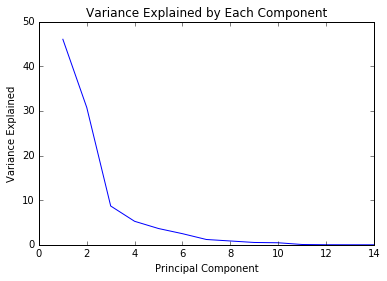

In [130]:
plt.plot(range(1,15), airvarianceexplained)
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("Variance Explained by Each Component")
plt.show()

In [131]:
cumairvar = np.cumsum(airvarianceexplained)

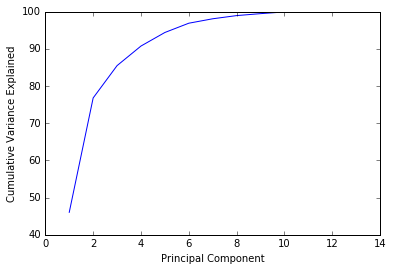

In [144]:
## cumulative variance explained by adding each new component

plt.plot(range(1,15), cumairvar)
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")
plt.show()

In [146]:
airca = PCA(n_components=3)

In [148]:
air_x = airca.fit_transform(standard_x)
air_x[0:5]

array([[ 2.01255752, -0.6675412 , -1.52022755],
       [ 2.42712187, -0.61285067, -1.21104723],
       [ 1.89314735, -0.92354986, -0.91162339],
       [ 1.47613708, -0.67831472, -0.66335115],
       [ 2.04318734, -0.71436421, -0.34874303]])

In [150]:
airpcas = pd.DataFrame(air_x, columns=["pc1", "pc2", "pc3"])

In [151]:
airpcas.head()

,pc1,pc2,pc3
0,2.012558,-0.667541,-1.520228
1,2.427122,-0.612851,-1.211047
2,1.893147,-0.923550,-0.911623
3,1.476137,-0.678315,-0.663351
4,2.043187,-0.714364,-0.348743
